Соломянко Алексей Сергеевич

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/cars.csv', delimiter = ',')

# удалим дубликаты и создадим новый набор
DF = df.drop_duplicates().reset_index(drop=True)


In [ ]:
cat_columns = []
num_columns = []
for column_name in DF.columns:
  if (DF[column_name].dtypes == object):
    cat_columns +=[column_name]
  else:
    num_columns +=[column_name]

Если какие-либо признаки встречаются крайне редко, то на таких значениях сложно обучить модель с высокой степенью обобщения. Поэтому, от редких высоких и низких значений признаков избавляются.

In [ ]:
# Старые автомобили с низким пробегом
question_dist_year = DF[(DF.Year <2021) & (DF.Distance < 1100)]
DF = DF.drop(question_dist_year.index)
# Аномально большой пробег
question_dist = DF[(DF.Distance > 0.5e6)]
DF = DF.drop(question_dist.index)
# Слишком малые значения объема двигателя
question_engine = DF [DF["Engine_capacity(cm3)"] < 200]
DF = DF.drop(question_engine.index)
# Слишком большие значения объема двигателя
question_engine = DF[DF["Engine_capacity(cm3)"] > 5000]
DF = DF.drop(question_engine.index)
# Аномально низкие цены
question_price = DF[DF["Price(euro)"] < 101]
DF = DF.drop(question_price.index)
# Слишком дорогие автомобили, которых мало
question_price = DF[DF["Price(euro)"] > 1e5]
DF = DF.drop(question_price.index)
# Слишком старые автомобили, которых мало
question_year = DF[DF.Year < 1971]
DF= DF.drop(question_year.index)
DF[num_columns].describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,32437.000000,32437.000000,32437.000000,32437.000000
mean,2008.301230,178655.003854,1866.584641,9485.431236
std,7.236478,91984.913105,609.493279,9615.464672
min,1971.000000,0.000000,200.000000,200.000000
25%,2005.000000,120829.000000,1500.000000,3550.000000
50%,2010.000000,180000.000000,1800.000000,6700.000000
75%,2014.000000,235000.000000,2000.000000,12150.000000
max,2021.000000,500000.000000,5000.000000,100000.000000


In [ ]:
# 2. выбрать строки с 69 по 322
data = DF.loc[69:322,:]
# отсортируем
data = data.sort_values(by='Distance', ascending=False)
#display(data)
data.head(2)

# Результат Coupe

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
181,Suzuki,Grand Vitara,2005,SUV,400000.0,2700.0,Petrol,Automatic,5500.0
227,Opel,Calibra,1992,Coupe,400000.0,2000.0,Metan/Propan,Manual,1600.0


<Axes: xlabel='Year', ylabel='Distance'>

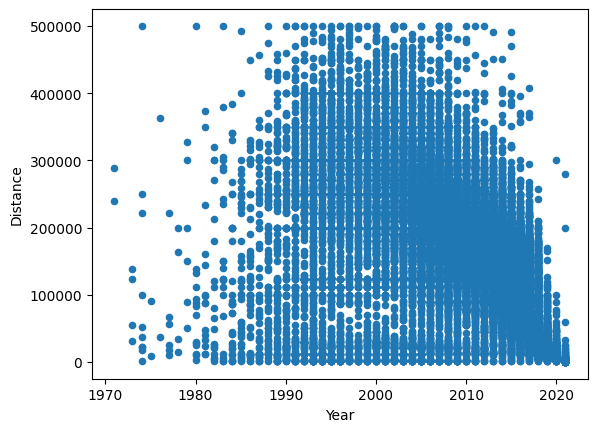

In [ ]:
DF.plot(x='Year', y= 'Distance', kind = 'scatter')



Style
Cabriolet      172
Combi          425
Coupe          787
Crossover     5201
Hatchback     6587
Microvan       545
Minivan       3355
Pickup         189
Roadster        40
SUV           4018
Sedan        12328
Universal     7360
Name: Distance, dtype: int64

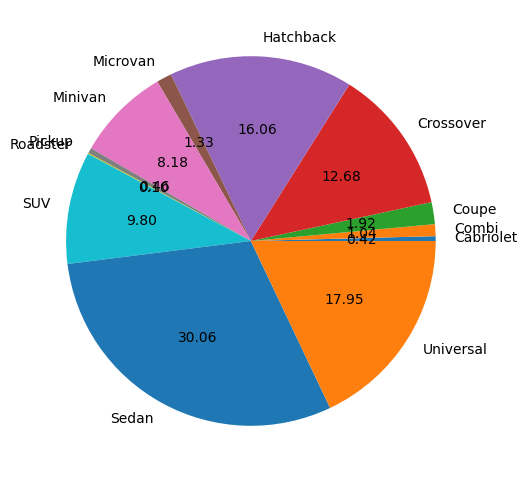

In [ ]:
df_style_dist = df.groupby('Style')['Distance'].count()
display(pd.Series(df_style_dist))
ax = pd.Series(df_style_dist).plot.pie(subplots=True, label='',
     figsize = (8, 6),
     autopct = '%.2f')